## Regresión con Redes Neuronales (parte 2)

Se intentará predecir el costo de seguro médico para personas con base en diferentes parámetros

Se utilizará el dataset, disponible públicamente, llamado [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) que se encuentra disponible en Kaggle y en [GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).


In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lectura de los datos
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
# Inspeccionar el conjunto de datos (dataset)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Se convertirá las columnas categóricas utilizando one-hot encoding. Para ello, se utilizará [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) de Pandas. 


In [5]:
# Turn all categories into numbers
df_one_hot = pd.get_dummies(df)
df_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Se separará los datos en atributos y etiquetas



In [7]:
# Crear X, y
X = df_one_hot.drop("charges", axis=1)
y = df_one_hot["charges"]

In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Se creará conjuntos de entrenamiento y prueba utilizando [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de Scikit-Learn.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

Se construirá y entrenará el modelo

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

historia = model.fit(X_train, y_train, epochs=100, verbose=0)

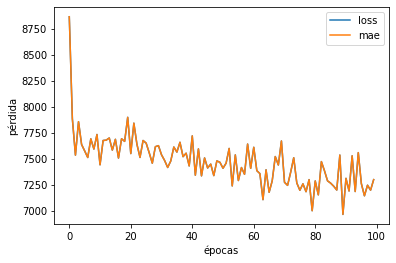

In [17]:
# Gráfico de la función de pérdida
pd.DataFrame(historia.history).plot()

plt.ylabel("pérdida")
plt.xlabel("épocas");

In [18]:
# Verificar los resultados del modelo (pérdida/MAE)
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

El modelo no se comporta bien. Se realizará 3 modificaciones:

- Incrementar el número de capas a 3
- Incrementar el número de unidades en cada capa (excepto en la capa de salida).
- Cambiar el optimizador (de SGD a Adam).

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # 100 neuronas
                               tf.keras.layers.Dense(10),  # 10 neuronas
                               tf.keras.layers.Dense(1)    # 1 neurona (para la salida)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

history = model_2.fit(X_train, y_train, epochs=100, verbose=0)

Hay una mejora: el error se reduce a aproximadamente la mitad

Para muchos problemas el optimizador de [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) es una buena alternativa. Una discusión más profunda se puede encontrar en [*A Recipe for Training Neural Networks*](http://karpathy.github.io/2019/04/25/recipe/). 

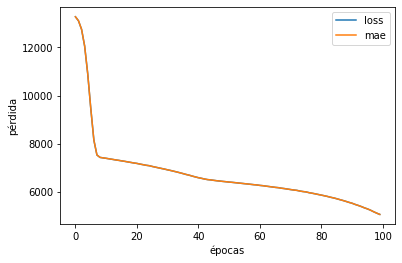

In [19]:
# Gráfico de la función de pérdida
pd.DataFrame(history.history).plot()

plt.ylabel("pérdida")
plt.xlabel("épocas");

In [20]:
# Evaluación del nuevo modelo
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [21]:
# Intentar entrenar por un poco más de épocas: 100 épocas más
history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [23]:
# Evaluar el modelo entrenado por un total de 200 épocas
model_2_loss, insurance_model_2_mae = model_2.evaluate(X_test, y_test)

model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3494.7285 - mae: 3494.7285


(3494.728515625, 3494.728515625)

Entrenando 100 épocas más, se ha reducido el error en un 10%

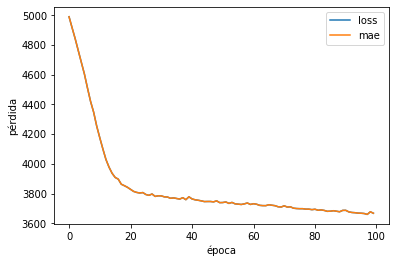

In [24]:
# Fundión de pérdida
pd.DataFrame(history_2.history).plot()

plt.ylabel("pérdida")
plt.xlabel("época"); # NOTA: solo se muestra los últimos 100 valores